# Learning Outcomes
1.  Gentle overview of Computer Vision
2. Review / Recap of concepts of images as Numpy array
3. Splitting and merging of color channels
4. Cropping
5. Point operators
6. Image blending (adding 2 images together)

## Setup

In [1]:
import sys
assert sys.version_info>=(3, 7)

import numpy as np
import cv2 as cv
from util_func import show_img

## Review of Images as array
What are the primary types of images > Grayscale and Color.

1. Grayscale => 2D array, known as Matrix
    - dimension: (h, w)
2. Color => 3D array
    - dimension: (h, w, channel)

In [2]:
# create a small black image
img = np.zeros((2, 4), dtype = np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


### How from Matrix (2x4) converted to (3x8)?
> broadcast (copy&paste) value of zeros 

In [4]:
img[0, 1] = 100
img[1, 2] = 55

print(img)

img_bgr = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_bgr)

[[  0 100   0   0]
 [  0   0  55   0]]
[[[  0   0   0]
  [100 100 100]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 55  55  55]
  [  0   0   0]]]


## Accessing elements in an array

In [5]:
img = cv.imread("images/lena.jfif")

a = img[29,  119, 1]
b = img.item(29, 119, 1)
a == b

True

In [6]:
%timeit a = img[29, 119, 1]
%timeit b = img.item(29, 119, 1)

63.2 ns ± 0.829 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
59.8 ns ± 0.727 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Image slicing

In [7]:
# extracting bottom right of an image

# 1. Determine height/width of image
h, w = img.shape[:2]

# 2. yc -> y/2, xc -> x/2
yc, xc = h // 2, w // 2 

# 3. Create image variable
bottomright = img[yc:, xc:]

# 4. Show image 
show_img("bottom right", bottomright)

In [8]:
middle = img[yc - 25:yc + 25, xc-25: xc+25]
show_img("middle", middle)

# Exercise.tutorial

In [9]:
# Create image
white = np.zeros((200, 200)) + 255
white = np.uint8(white)

show_img("white", white)

In [10]:
# Extract flower from flower.jfif

img = cv.imread("images/flower.jfif")
img_copy = img.copy()

show_img("img", img)

In [11]:
[]

[]

In [12]:
# 1st Way: GUI INTERACTION
def rect_extract(event, x, y, flag, params):
    "This is a mouse-click call back function"
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", rect_extract)
cv.waitKey(0)
cv.destroyAllWindows()

(56, 27)
(196, 40)


In [13]:
flower = img_copy[39:119, 91:173]

show_img("flower", flower)

In [14]:
# 2nd way, built-in function
b = cv.selectROI("crop", img_copy)

# CV slicing look at width first, Numpy slicing look at height first
roi = img_copy[int(b[1]):int(b[1] + b[3]), 
                int(b[0]):int(b[0] + b[2])] #(x, y, w, h)

show_img("flower", roi)

## Exercise.code

In [15]:
patch = np.zeros((60, 60), dtype=np.uint8) # dimension better be a multiple of 3

patch[:20, 20:40] = 255
patch[20:40, :20] = 255
patch[20:40, 40:] = 255
patch[40:, 20:40] = 255

img = np.tile(patch, (3, 3))

show_img("pattern", img)

## Image Cropping

Why?
1. Remove unwanted object from image
2. Separate the image into a $3 \times 3$ grids, such that object of interest should lie on the gridlines or their intersections, then the image would look more appealing. This is known as rule of thirds.
3. One of Image Augmentation methods to train Deep Learning models.

In [18]:
# Separate the image into multiple rectangular grids

img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
# user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

M, N = int(h / n_vertical_grids), int(w / n_horizontal_grids) # M > Number of row pixels, N > Number of column pixels

tiles = []

for y in range (0, h, M):
    for x in range (0, w, N):
        x1 = x + N
        y1 = y + M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("DOG", img_copy)

In [19]:
show_img("patch", tiles[9])

## Splitting and merging of color channels

In [20]:
img = cv.imread("images/lena.jfif")

# split
b, g, r = cv.split(img)
img_merge = cv.merge((b, g, r))
np.array_equal(img, img_merge)

True

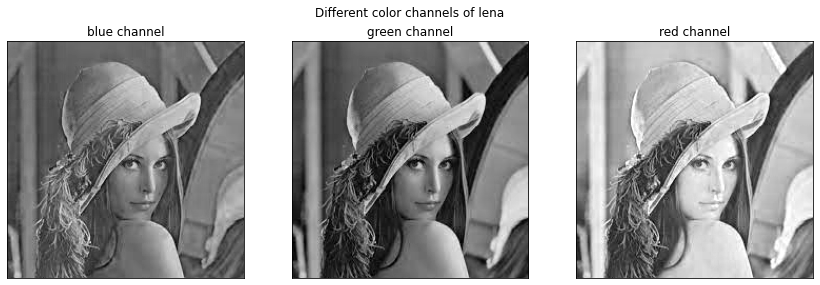

In [22]:
import matplotlib.pyplot as plt

# show all the channels on matplot subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle("Different color channels of lena")

ax1.imshow(b,cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[], yticks=[])
ax2.imshow(g,cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[], yticks=[])
ax3.imshow(r,cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[], yticks=[])

plt.tight_layout()
plt.show()

## Exercise
### Get blue, green and red color images

In [24]:
img = cv.imread("images/lena.jfif")

# window open
colors = ("blue", "green", "red")

# split the image into channels
channels = cv.split(img)

# an empty list to hold the created array
imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[:, :, i] = ch # img_arr[..., i] = ch
    imgs.append(img_arr)
    
for c, img in zip(colors, imgs):
    cv.imshow(c, img)

cv.waitKey(0)
cv.destroyAllWindows()

## Mathematical Operators
$$f_{trans}(\textbf[x]) = \alpha f(\textbf[x]) + \beta$$

In [25]:
np.uint8(np.array([-4, 0, 255, 280])) # 

array([252,   0, 255,  24], dtype=uint8)

In [26]:
def point_op(img, alpha, beta):
    """Point operators for image, Arguments:
    1. Source image
    2. Multiplier
    3. Constant"""
    
    img = img.astype(float)
    img = alpha * img + beta
    res = np.clip(img, 0, 255)
    return np.uint8(res)

In [32]:
img = cv.imread("images/bridge.jfif")

# Enhance the contrast and increase the brightness
transform = point_op(img, 1.8, 30)

cv.imshow("bridge (ORIGINAL)", img)
show_img("transform (PROCESSED)", transform)

In [33]:
darken = point_op(img, 1.0, -80)

show_img("darken", darken)

### Gamma correction
$$(O)utput = (\frac{(I)nput}{255})^{\gamma}\times 255$$

In [34]:
gamma = 1 / 2.2

lookUpTable = np.empty((1, 256), dtype = np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img)
show_img("gamma corrected", res, adjust=True)

## Image blending

$$g(\textbf{x} = \alpha f(\textbf{x}) + (1 - \alpha))$$ #unfinished, might be incorrect

g(x)=(1−α)f0(x)+(α)f1(x)


In [36]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# dimension of both images must be same, therefore require resizing of img2
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alpha = 0.6

res = cv.addWeighted(img, alpha, img2, 1-alpha, 0)

cv.imshow("img1", img)
cv.imshow("img2", img2)
show_img("blending", res)

# Weekly Activity

In [2]:
import numpy as np

width = 256
height = 256

ttl_pixels = width * height

img_color = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)
img_grayscale = np.random.randint(0, 256, (height, width), dtype=np.uint8)

print(img_color)
print(img_grayscale)

[[[200 170 161]
  [204 115  96]
  [201 177 154]
  ...
  [175 229  60]
  [100 194  80]
  [244 122  33]]

 [[ 27 106  91]
  [148  17 120]
  [140  46 125]
  ...
  [ 93 195 211]
  [ 57 128 118]
  [218 203 221]]

 [[203  48 183]
  [171  52 121]
  [ 40  68  85]
  ...
  [200 205  19]
  [211 133  14]
  [190 206 172]]

 ...

 [[199  26  45]
  [233 138  95]
  [ 42   0 159]
  ...
  [123 110  15]
  [200 142  40]
  [ 38  57  88]]

 [[  9 250  57]
  [ 50 162  83]
  [139 161 202]
  ...
  [119 134 196]
  [207 152 191]
  [ 78 180 127]]

 [[  2 233 187]
  [112 144 205]
  [159 118 175]
  ...
  [153 105 202]
  [109  27 143]
  [ 94  90  66]]]
[[ 91 120 104 ... 173  10 156]
 [147 227 125 ... 226 101 184]
 [237 102  94 ...  71  33 239]
 ...
 [ 25 136 115 ...  47  15  87]
 [181 144 219 ... 165 151 122]
 [145  14  17 ...   4 178  47]]


In [3]:
import cv2 as cv
import numpy as np

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    height, width = img.shape[:2]
    
    # Calculate the number of patches along x and y axes
    num_vertical_patches = num_vertical_grid
    num_horizontal_patches = num_horizontal_grid
    
    # Calculate the number of pixels per patch
    M, N = int(height / num_vertical_patches), int(width / num_horizontal_patches)
    
    x1, y1 = 0, 0
    
    for y in range(0, height, M):
        for x in range(0, width, N):
            
            y1 = y + M
            x1 = x + N
            
            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                tile = img[y:height, x:width]
                cv.rectangle(img_copy, (x,y), (x1, y1), line_color, 1)
                cv.imshow('tile', tile)
                
            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
# Example usage
img = cv.imread('images/dog.jfif')
crop_grid(img, 3, 2, (0, 255, 0))

In [6]:
import cv2 as cv
import numpy as np

def display_image_sequence(img1, img2, alpha_values):
    # Reshape img2 to match img1's shape
    new_shape = img1.shape[:2]
    img2 = cv.resize(img2, new_shape[::-1])

    for alpha in alpha_values:
        # Perform alpha blending
        dst = cv.addWeighted(img1, alpha, img2, 1 - alpha, 0)

        # Display the blended image
        cv.imshow('Blending', dst)
        cv.waitKey(500)  # Adjust the delay between each frame (in milliseconds)

    cv.destroyAllWindows()

# Load the base images
img1 = cv.imread('images/lena.jfif')
img2 = cv.imread('images/coins.jfif')

# Define the alpha values for the sequence
alpha_values = np.linspace(0, 1, num=10)  # Change the number of steps for a smoother transition

# Display the image sequence
display_image_sequence(img1, img2, alpha_values)


In [ ]:
import cv2 as cv
import numpy as np

def apply_watermark(image_path, watermark_path, output_path):
    # Load the original image and watermark image
    image = cv.imread(image_path)
    watermark = cv.imread(watermark_path, cv.IMREAD_UNCHANGED)

    # Resize the watermark to fit the image
    watermark = cv.resize(watermark, (image.shape[1], image.shape[0]))

    if watermark.shape[2] == 4:
        # Create a mask from the watermark's alpha channel
        mask = watermark[:, :, 3]

        # Convert the mask to a 3-channel grayscale image
        mask = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

        # Merge the mask with the inverted watermark
        watermark = cv.bitwise_and(watermark[:, :, :3], cv.bitwise_not(mask))
    else:
        # If the watermark image doesn't have an alpha channel, use it directly
        watermark = cv.cvtColor(watermark, cv.COLOR_BGR2RGB)

    # Add the watermark to the image
    output = cv.add(image, watermark)

    # Save the watermarked image
    cv.imwrite(output_path, output)

    # Display the watermarked image
    cv.imshow('Watermarked Image', output)
    cv.waitKey(0)
    cv.destroyAllWindows()

image_path = 'images/travel_hd.jpg'
watermark_path = 'images/flower.jfif'
output_path = 'images/watermarked_image.jpg'

# Apply the watermark
apply_watermark(image_path, watermark_path, output_path)
